# AI_OR_NOT





In [1]:
%%capture
!pip install datasets

In [2]:
%%capture
!pip install transformers

In [3]:
%%capture
!unzip  /content/drive/MyDrive/Ai_Or_Not.zip

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.keras import layers

In [6]:
from tensorflow.keras import regularizers


In [7]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB7

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

In [9]:
def Plottings(history):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [10]:
def evaluate_model(model, val_generator):
    val_images, val_labels = [], []

    for i in range(len(val_generator)):
        images, labels = val_generator[i]
        val_images.extend(images)
        val_labels.extend(labels)  # No need to use np.argmax here

    val_images = np.array(val_images)
    val_labels = np.array(val_labels)

    predictions = model.predict(val_images)
    y_pred = np.round(predictions)  # Adjusted for binary classification
    y_true = val_labels

    # Confusion Matrix
    confusion_mat = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(confusion_mat)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=['fake', 'real'])
    print('Classification Report:')
    print(report)

def plot_confusion_matrix(confusion_mat):
    class_names = ['fake', 'real']
    fig, ax = plt.subplots()
    cax = ax.matshow(confusion_mat, cmap='Reds')
    cbar = fig.colorbar(cax)

    ax.set_xticklabels([''] + class_names, rotation=45)
    ax.set_yticklabels([''] + class_names)

    for i in range(confusion_mat.shape[0]):
        for j in range(confusion_mat.shape[1]):
            ax.text(j, i, str(confusion_mat[i, j]), ha='center', va='center')

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
#!unzip  /content/Car_Damage_Severity_Dataset.zip

In [11]:
train_dir = '/content/Ai_Or_Not'


In [12]:
img_width, img_height = 350, 350


In [13]:
image_size = (img_width, img_height)


In [14]:
epochs = 50
batch_size=6

In [35]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [36]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

Found 2424 images belonging to 2 classes.
Found 606 images belonging to 2 classes.


In [ ]:
inputs = keras.Input(shape=image_size+(3,))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(128, 3)(x)
x = layers.Activation("relu")(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x=  layers.Flatten()(x)
x = Dense(128)(x)
x=  layers.LeakyReLU(alpha=0.02)(x)
x = layers.Dropout(0.2)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, output)

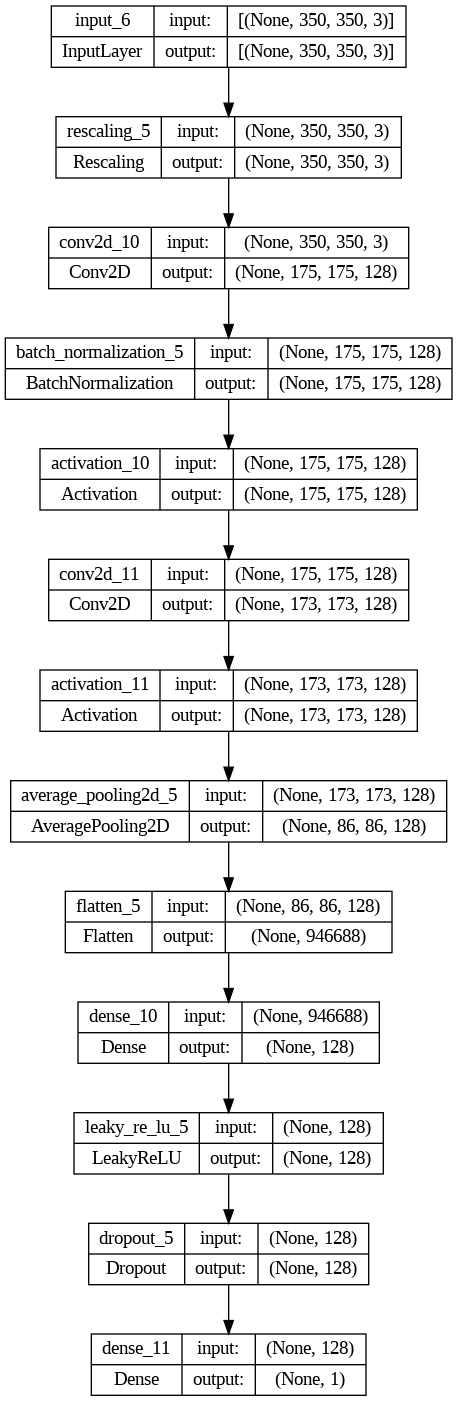

In [ ]:
keras.utils.plot_model(model, show_shapes=True)


In [ ]:


callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


In [ ]:
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/50
404/404 [==============================] - 191s 469ms/step - loss: 0.8095 - accuracy: 0.6869 - val_loss: 0.6494 - val_accuracy: 0.5644
Epoch 2/50
404/404 [==============================] - 173s 429ms/step - loss: 0.4671 - accuracy: 0.7776 - val_loss: 0.6229 - val_accuracy: 0.7624
Epoch 3/50
404/404 [==============================] - 170s 422ms/step - loss: 0.3952 - accuracy: 0.8325 - val_loss: 2.2577 - val_accuracy: 0.6106
Epoch 4/50
404/404 [==============================] - 163s 405ms/step - loss: 0.3145 - accuracy: 0.8742 - val_loss: 0.8739 - val_accuracy: 0.6469
Epoch 5/50
404/404 [==============================] - 160s 395ms/step - loss: 0.2799 - accuracy: 0.8833 - val_loss: 0.3855 - val_accuracy: 0.8647
Epoch 6/50
404/404 [==============================] - 163s 403ms/step - loss: 0.2302 - accuracy: 0.9117 - val_loss: 1.0742 - val_accuracy: 0.6287
Epoch 7/50
404/404 [==============================] - 163s 404ms/step - loss: 0.2336 - accuracy: 0.9125 - val_loss: 21.2886 

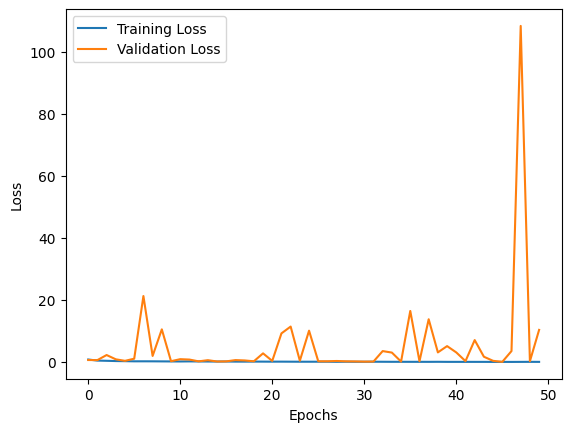

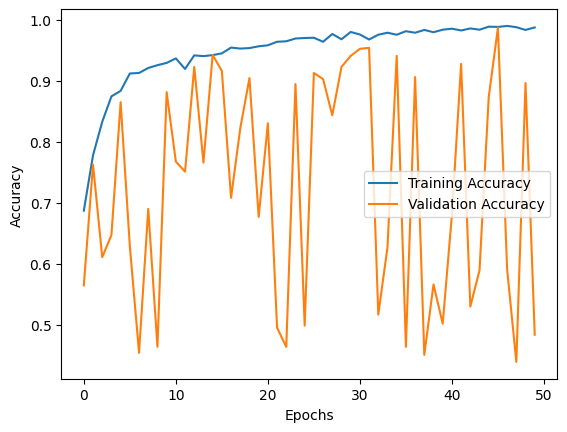

In [ ]:
Plottings(history)

(350, 350, 3)

19/19 [==============================] - 4s 126ms/step


<ipython-input-64-78cb5097cbcf>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names, rotation=45)
<ipython-input-64-78cb5097cbcf>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


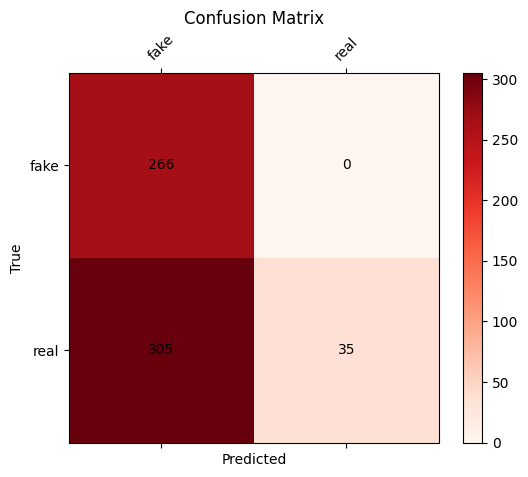

Classification Report:
              precision    recall  f1-score   support

        fake       0.47      1.00      0.64       266
        real       1.00      0.10      0.19       340

    accuracy                           0.50       606
   macro avg       0.73      0.55      0.41       606
weighted avg       0.77      0.50      0.38       606



In [ ]:

evaluate_model(model, val_generator)


## Second Model

258076736/258076736 [==============================] - 12s 0us/step


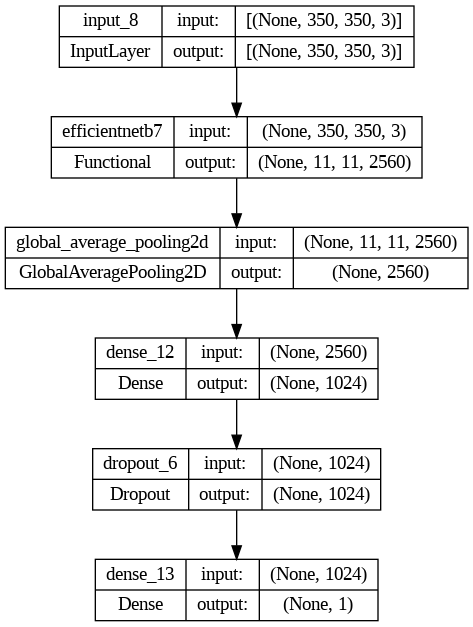

In [ ]:


base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=image_size+(3,))
n_layers_to_unfreeze = 5
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-n_layers_to_unfreeze:]:
    layer.trainable = True
input_tensor = tf.keras.Input(shape=image_size+(3,))
x = layers.Rescaling(1.0 / 255)(input_tensor)
x = base_model(input_tensor)
x = layers.GlobalAveragePooling2D()(x)
x =Dense(1024, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x = layers.Dropout(0.2)(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)

model2 = Model(inputs=input_tensor, outputs=output_tensor)


keras.utils.plot_model(model2, show_shapes=True)


In [ ]:

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model2.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
history2 = model2.fit(train_generator, epochs=7, validation_data=val_generator)

Epoch 1/7
404/404 [==============================] - 197s 489ms/step - loss: 0.2489 - accuracy: 0.9645 - val_loss: 0.1948 - val_accuracy: 0.9868
Epoch 2/7
404/404 [==============================] - 192s 475ms/step - loss: 0.2232 - accuracy: 0.9752 - val_loss: 0.1805 - val_accuracy: 0.9950
Epoch 3/7
404/404 [==============================] - 191s 472ms/step - loss: 0.2162 - accuracy: 0.9773 - val_loss: 0.1768 - val_accuracy: 0.9884
Epoch 4/7
404/404 [==============================] - 191s 474ms/step - loss: 0.2117 - accuracy: 0.9744 - val_loss: 0.1652 - val_accuracy: 0.9950
Epoch 5/7
404/404 [==============================] - 197s 487ms/step - loss: 0.1912 - accuracy: 0.9827 - val_loss: 0.1592 - val_accuracy: 0.9950
Epoch 6/7
404/404 [==============================] - 192s 475ms/step - loss: 0.2013 - accuracy: 0.9773 - val_loss: 0.1661 - val_accuracy: 0.9917
Epoch 7/7
404/404 [==============================] - 190s 471ms/step - loss: 0.1985 - accuracy: 0.9728 - val_loss: 0.1497 - val_ac

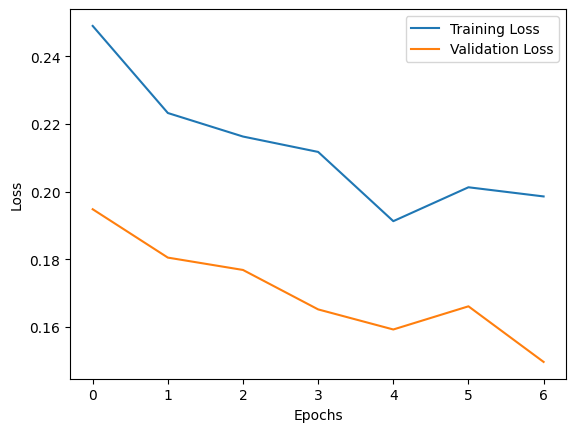

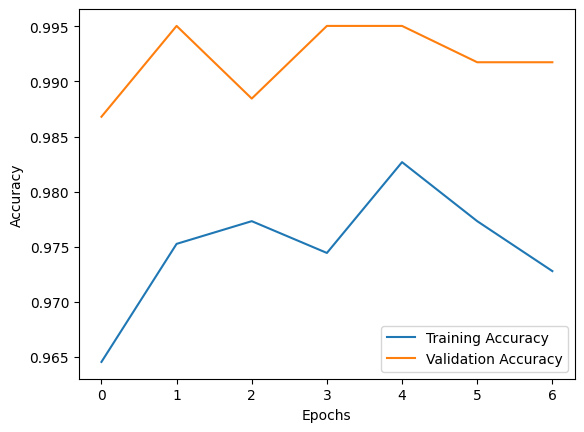

In [ ]:
Plottings(history2)

19/19 [==============================] - 27s 1s/step


<ipython-input-64-78cb5097cbcf>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names, rotation=45)
<ipython-input-64-78cb5097cbcf>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


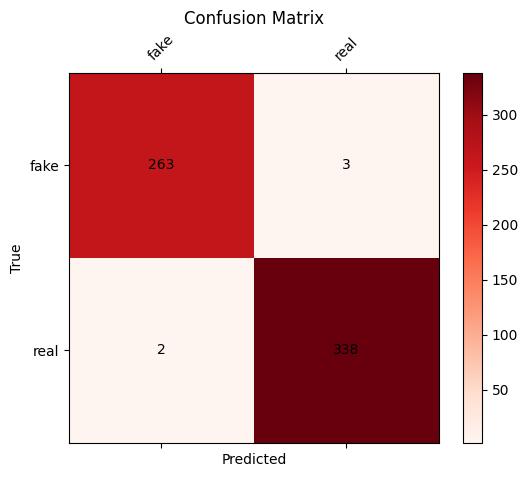

Classification Report:
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99       266
        real       0.99      0.99      0.99       340

    accuracy                           0.99       606
   macro avg       0.99      0.99      0.99       606
weighted avg       0.99      0.99      0.99       606



In [ ]:
evaluate_model(model2, val_generator)


## VIT

In [15]:
import os
import datasets

def create_image_folder_dataset(root_path):
  """creates `Dataset` from image folder structure"""

  # get class names by folders names
  _CLASS_NAMES= os.listdir(root_path)
  # defines `datasets` features`
  features=datasets.Features({
                      "img": datasets.Image(),
                      "label": datasets.features.ClassLabel(names=_CLASS_NAMES),
                  })
  # temp list holding datapoints for creation
  img_data_files=[]
  label_data_files=[]
  # load images into list for creation
  for img_class in os.listdir(root_path):
    for img in os.listdir(os.path.join(root_path,img_class)):
      path_=os.path.join(root_path,img_class,img)
      img_data_files.append(path_)
      label_data_files.append(img_class)
  # create dataset
  ds = datasets.Dataset.from_dict({"img":img_data_files,"label":label_data_files},features=features)
  return ds



In [16]:
VIT_ds = create_image_folder_dataset("/content/Ai_Or_Not")


In [17]:
img_class_labels = VIT_ds.features["label"].names


In [18]:
img_class_labels

['real', 'fake']

In [19]:
VIT_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 3030
})

In [20]:
model_id = "google/vit-base-patch16-224-in21k"


In [21]:
from transformers import ViTFeatureExtractor
from tensorflow import keras
from tensorflow.keras import layers


feature_extractor = ViTFeatureExtractor.from_pretrained(model_id)

data_augmentation = keras.Sequential(
    [
        layers.Resizing(feature_extractor.size, feature_extractor.size),
        layers.Rescaling(1./255),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# use keras image data augementation processing
def augmentation(examples):
    # print(examples["img"])
    examples["pixel_values"] = [data_augmentation(image) for image in examples["img"]]
    return examples


# basic processing (only resizing)
def process(examples):
    examples.update(feature_extractor(examples['img'], ))
    return examples

# we are also renaming our label col to labels to use `.to_tf_dataset` later
VIT_ds = VIT_ds.rename_column("label", "labels")








preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [22]:
processed_dataset = VIT_ds.map(process, batched=True)
processed_dataset




Map:   0%|          | 0/3030 [00:00<?, ? examples/s]

Dataset({
    features: ['img', 'labels', 'pixel_values'],
    num_rows: 3030
})

In [23]:
test_size=.2

processed_dataset = processed_dataset.shuffle().train_test_split(test_size=test_size)


In [24]:
from huggingface_hub import HfFolder
import tensorflow as tf

id2label = {str(i): label for i, label in enumerate(img_class_labels)}
label2id = {v: k for k, v in id2label.items()}

num_train_epochs = 5
train_batch_size = 4
eval_batch_size = 4
learning_rate = 3e-5
weight_decay_rate=0.01
num_warmup_steps=0
output_dir=model_id.split("/")[1]






In [25]:
from transformers import DefaultDataCollator

# Data collator that will dynamically pad the inputs received, as well as the labels.
data_collator = DefaultDataCollator(return_tensors="tf")

# converting our train dataset to tf.data.Dataset
tf_train_dataset = processed_dataset["train"].to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=True,
   batch_size=train_batch_size,
   collate_fn=data_collator)

# converting our test dataset to tf.data.Dataset
tf_eval_dataset = processed_dataset["test"].to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=True,
   batch_size=eval_batch_size,
   collate_fn=data_collator)


/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:399: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [26]:
from transformers import TFViTForImageClassification, create_optimizer
from transformers import ViTForImageClassification, create_optimizer

import tensorflow as tf

# create optimizer wight weigh decay
num_train_steps = len(tf_train_dataset) * num_train_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=learning_rate,
    num_train_steps=num_train_steps,
    weight_decay_rate=weight_decay_rate,
    num_warmup_steps=num_warmup_steps,
)

# load pre-trained ViT model
model = TFViTForImageClassification.from_pretrained(
    model_id,
    num_labels=len(img_class_labels),
    id2label=id2label,
    label2id=label2id,

)



# compile model
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
               metrics=["accuracy"],

              )


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some layers from the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing TFViTForImageClassification: ['vit/pooler/dense/kernel:0', 'vit/pooler/dense/bias:0']
- This IS expected if you are initializing TFViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
import os
from transformers.keras_callbacks import PushToHubCallback
from tensorflow.keras.callbacks import TensorBoard as TensorboardCallback, EarlyStopping

callbacks=[]

callbacks.append(TensorboardCallback(log_dir=os.path.join(output_dir,"logs")))
callbacks.append(EarlyStopping(monitor="val_accuracy",patience=1))


In [32]:
train_results = model.fit(
    tf_train_dataset,
    validation_data=tf_eval_dataset,
    callbacks=callbacks,
    epochs=7,
)

Epoch 1/7
606/606 [==============================] - 846s 1s/step - loss: 6.9817e-04 - accuracy: 0.0800 - val_loss: 0.0029 - val_accuracy: 0.1056
Epoch 2/7
606/606 [==============================] - 844s 1s/step - loss: 2.3974e-04 - accuracy: 0.1085 - val_loss: 0.0028 - val_accuracy: 0.1155
Epoch 3/7
606/606 [==============================] - 846s 1s/step - loss: 1.8305e-04 - accuracy: 0.1106 - val_loss: 0.0028 - val_accuracy: 0.1155


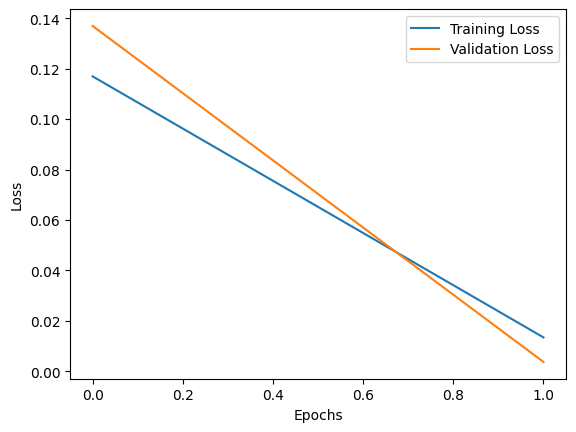

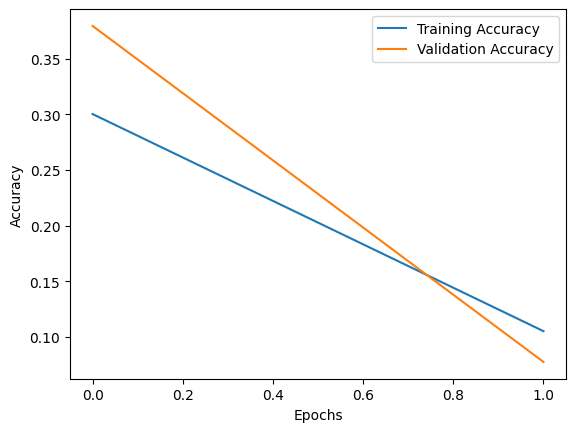

In [31]:
Plottings(train_results)